In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from collections import defaultdict

dataset_path = '/content/drive/MyDrive/dataset4'

print(f"\nChecking dataset folder: {dataset_path}")
class_counts = {}

for cls in os.listdir(dataset_path):
    cls_path = os.path.join(dataset_path, cls)
    if os.path.isdir(cls_path):
        count = len(os.listdir(cls_path))
        class_counts[cls] = count

#Print all class counts
print("\nClass-wise image counts:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count}")

#Reverse map: count -> list of classes
count_map = defaultdict(list)
for cls, count in class_counts.items():
    count_map[count].append(cls)

print("\nClasses with identical image:")
found = False
for count, classes in count_map.items():
    if len(classes) > 1:
        print(f"  {count} images: {classes}")
        found = True

if not found:
    print("  No identical image among classes.")



Checking dataset folder: /content/drive/MyDrive/dataset4

Class-wise image counts:
  Covid19: 586
  Pneumonia: 4273
  Tuberculosis: 700
  Normal: 1583

Classes with identical image counts:
  No identical image count among classes.


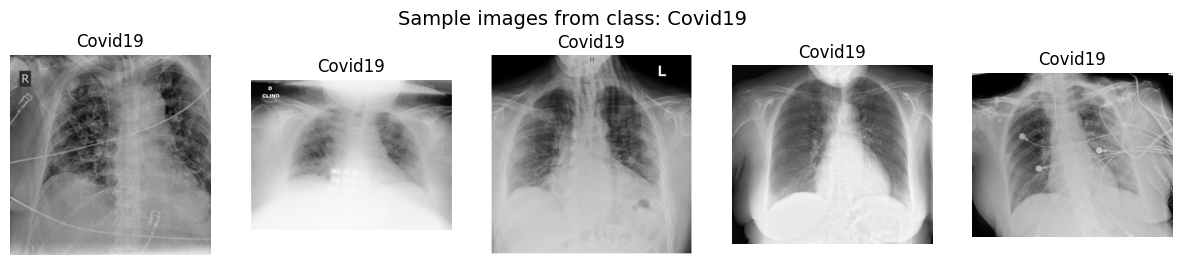

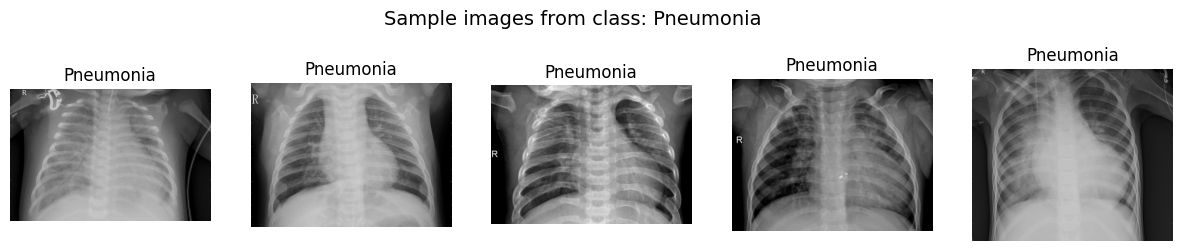

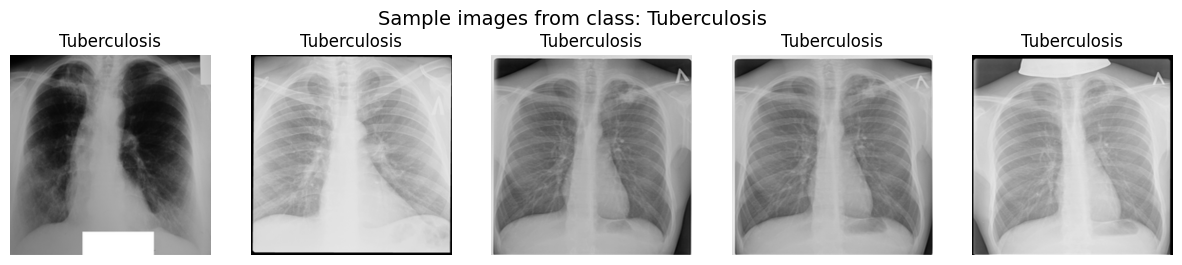

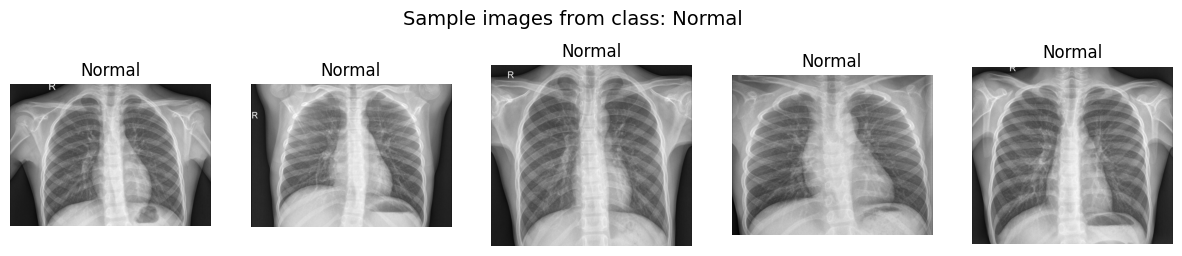

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = '/content/drive/MyDrive/dataset4'


selected_classes = ['Covid19', 'Pneumonia', 'Tuberculosis', 'Normal']

for cls in selected_classes:
    cls_path = os.path.join(dataset_path, cls)
    images = sorted(os.listdir(cls_path))[:5]

    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(images):
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path).convert('L')
        plt.subplot(1, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(cls)
    plt.suptitle(f"Sample images from class: {cls}", fontsize=14)
    plt.show()


In [ ]:
import os
import shutil
import random

dataset_path = '/content/drive/MyDrive/dataset4'
output_path = '/content/drive/MyDrive/dataset_split'
split_ratios = {'train': 0.7, 'val': 0.15, 'test': 0.15}

# Create split folders
for split in split_ratios:
    for cls in os.listdir(dataset_path):
        os.makedirs(os.path.join(output_path, split, cls), exist_ok=True)

# Split and copy
for cls in os.listdir(dataset_path):
    cls_path = os.path.join(dataset_path, cls)
    if not os.path.isdir(cls_path):
        continue

    images = [img for img in os.listdir(cls_path) if img.lower().endswith(('jpg', 'jpeg', 'png'))]
    random.shuffle(images)

    total = len(images)
    train_end = int(split_ratios['train'] * total)
    val_end = train_end + int(split_ratios['val'] * total)

    splits = {
        'train': images[:train_end],
        'val': images[train_end:val_end],
        'test': images[val_end:]
    }

    for split_name, split_images in splits.items():
        for img in split_images:
            src = os.path.join(cls_path, img)
            dst = os.path.join(output_path, split_name, cls, img)
            shutil.copy2(src, dst)

print("Dataset split completed successfully.")


Dataset split completed successfully.


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

train_path = '/content/drive/MyDrive/dataset_split/train'

classes = sorted(os.listdir(train_path))
counts = []

for cls in classes:
    cls_path = os.path.join(train_path, cls)
    counts.append(len(os.listdir(cls_path)))

print("Training samples per class:", dict(zip(classes, counts)))

# Create an array of all class labels according to sample counts
labels = []
for cls, count in zip(classes, counts):
    labels.extend([cls] * count)

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.array(classes),
                                     y=np.array(labels))

weights_dict = dict(zip(classes, class_weights))
print("Class weights:", weights_dict)


Training samples per class: {'Covid19': 410, 'Normal': 1108, 'Pneumonia': 2991, 'Tuberculosis': 489}
Class weights: {'Covid19': np.float64(3.047560975609756), 'Normal': np.float64(1.1277075812274369), 'Pneumonia': np.float64(0.417753259779338), 'Tuberculosis': np.float64(2.5552147239263805)}


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Class weights: {0: np.float64(3.047560975609756), 1: np.float64(1.1277075812274369), 2: np.float64(0.417753259779338), 3: np.float64(2.5552147239263805)}
Found 4998 images belonging to 4 classes.
Found 1069 images belonging to 4 classes.
Found 1075 images belonging to 4 classes.
=== Model Summary ===


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ main_input          │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ effnetb0_layer      │ (None, 1280)      │          0 │ main_input[0][0]  │
│ (Lambda)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ effnetb1_layer      │ (None, 1280)      │          0 │ main_input[0][0]  │
│ (Lambda)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ effnetb2_layer      │ (None, 1408)      │          0 │ main_input[0][0]  │
│ (Lambda)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 3968)      │          0 │ effnetb0_layer[0… │
│ (Concatenate)       │                   │            │ effnetb1_layer[0… │
│                     │                   │            │ effnetb2_layer[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │  2,032,128 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │    131,328 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 4)         │      1,028 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,164,484 (8.26 MB)

 Trainable params: 2,164,484 (8.26 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1994s 12s/step - accuracy: 0.6983 - loss: 0.8050 - val_accuracy: 0.8793 - val_loss: 0.3194 - learning_rate: 1.0000e-04
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1690s 11s/step - accuracy: 0.8894 - loss: 0.2604 - val_accuracy: 0.9046 - val_loss: 0.2577 - learning_rate: 1.0000e-04
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1730s 11s/step - accuracy: 0.9169 - loss: 0.1948 - val_accuracy: 0.8868 - val_loss: 0.3137 - learning_rate: 1.0000e-04
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1739s 11s/step - accuracy: 0.9238 - loss: 0.1770 - val_accuracy: 0.9074 - val_loss: 0.2428 - learning_rate: 1.0000e-04
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1716s 11s/step - accuracy: 0.9314 - loss: 0.1438 - val_accuracy: 0.8943 - val_loss: 0.2960 - learning_rate: 1.0000e-04
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1692s 11s/step - accuracy: 0.9375 - loss: 0.1390 - val_accuracy: 0.8999 - val_loss: 0.2766 - learning_rate: 1.0000e-04
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1687s 

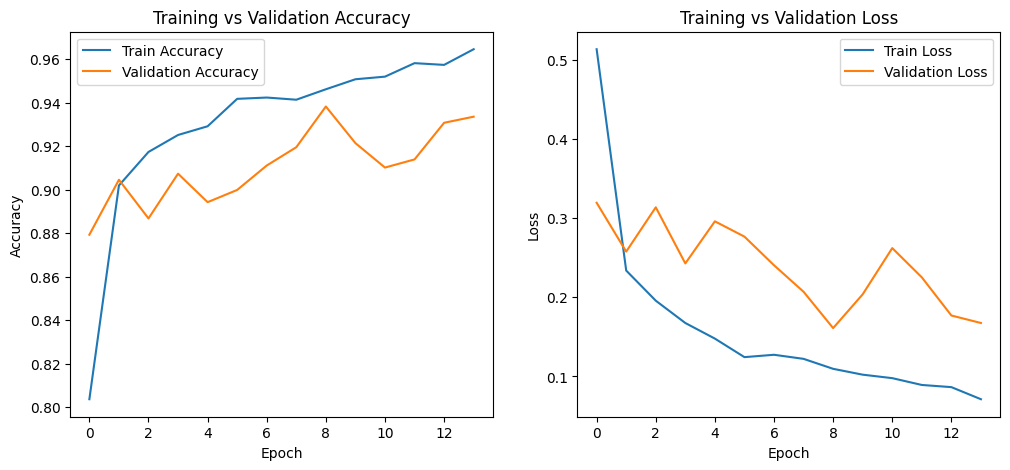

34/34 ━━━━━━━━━━━━━━━━━━━━ 293s 9s/step - accuracy: 0.9518 - loss: 0.1254

Overall Validation Accuracy: 0.9383
34/34 ━━━━━━━━━━━━━━━━━━━━ 279s 8s/step - accuracy: 0.9620 - loss: 0.1227

Overall Test Accuracy: 0.9479
Found 4998 images belonging to 4 classes.
Found 1069 images belonging to 4 classes.
Found 1075 images belonging to 4 classes.
157/157 ━━━━━━━━━━━━━━━━━━━━ 1447s 9s/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 277s 8s/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 281s 8s/step
RandomForest and SVM models saved at: /content/drive/MyDrive/Ensemble_Models/sklearn_models
Meta learner model saved at: /content/drive/MyDrive/Ensemble_Models/sklearn_models

=== Performance Summary ===
Test Accuracy    : 0.9600
Macro Precision  : 0.9633
Macro Recall     : 0.9639
Macro F1-score   : 0.9636
Macro ROC-AUC    : 0.9933

Classification Report:

              precision    recall  f1-score   support

     Covid19       0.98      0.98      0.98        89
      Normal       0.92      0.92      0.92       238
   Pneumonia 

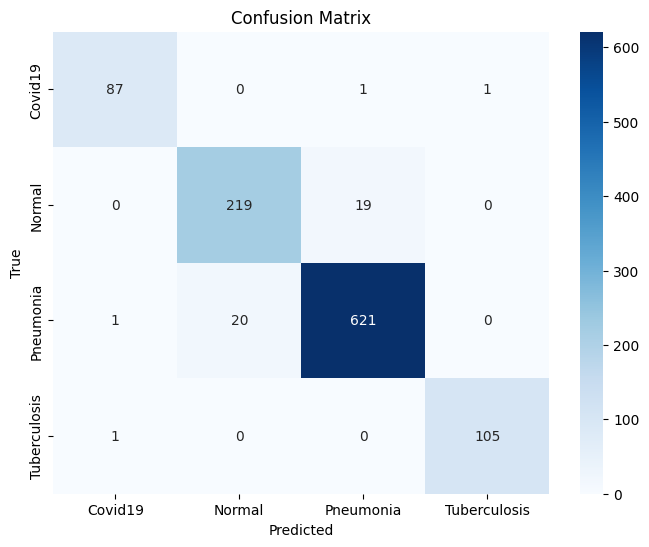


=== Per-Class Test Accuracy ===
Covid19: 97.75% accuracy (87/89)
Normal: 92.02% accuracy (219/238)
Pneumonia: 96.73% accuracy (621/642)
Tuberculosis: 99.06% accuracy (105/106)


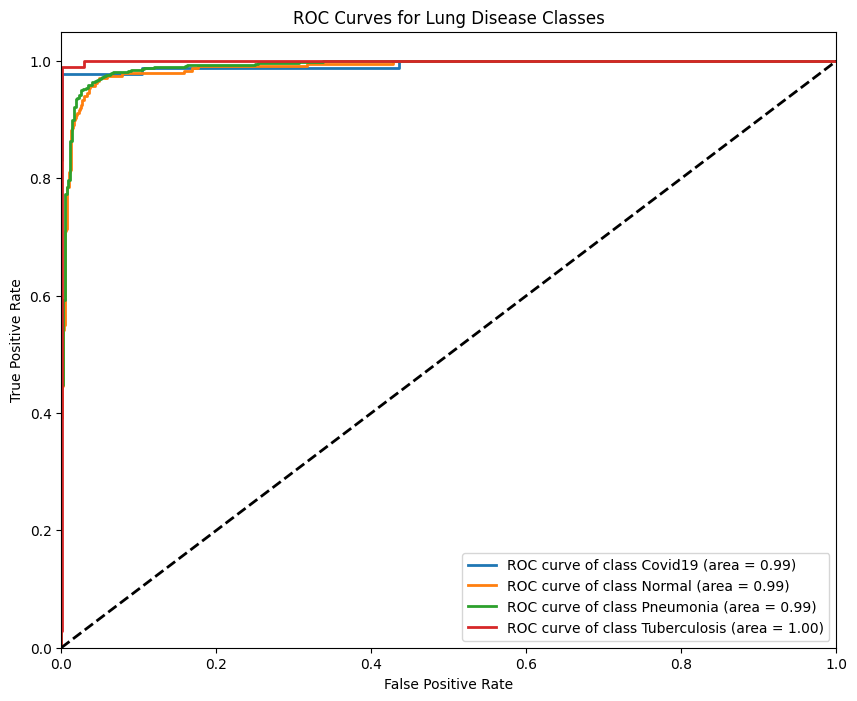

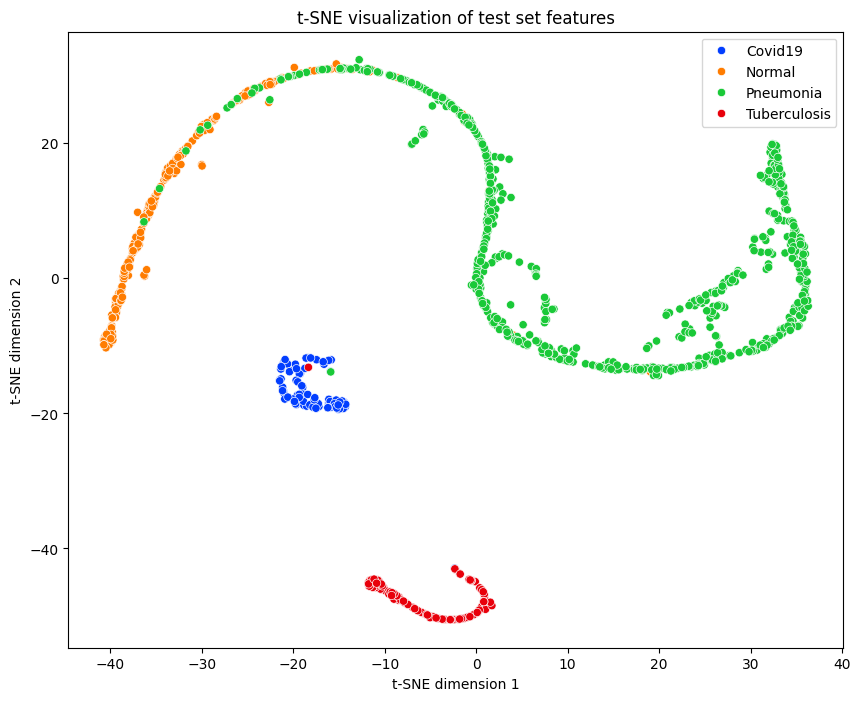

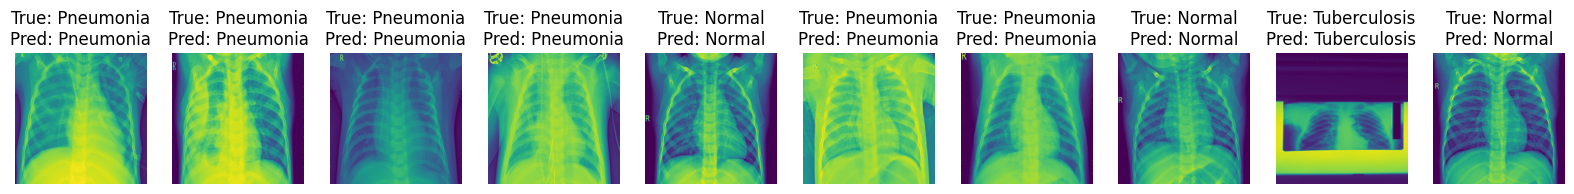

In [ ]:
 import numpy as np
 import cv2
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, precision_recall_fscore_support
from sklearn.manifold import TSNE
from sklearn.preprocessing import label_binarize
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from PIL import Image

# -------------------
# Parameters & Data Setup
# -------------------

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 4

dataset_path = '/content/drive/MyDrive/dataset_split'
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')
test_dir = os.path.join(dataset_path, 'test')


# -------------------
# Data generators with on-the-fly augmentation for training only
# -------------------

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)

val_gen = val_test_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# -------------------
# Build Multichannel EfficientNet model using TensorFlow Hub
# -------------------

def build_multichannel_efficientnet_tfhub():
    input_shape = (224, 224, 3)
    input_tensor = Input(shape=input_shape, name='main_input')

    effnetb0_layer = Lambda(lambda x: hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1", trainable=False)(x), name='effnetb0_layer')
    effnetb1_layer = Lambda(lambda x: hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1", trainable=False)(x), name='effnetb1_layer')
    effnetb2_layer = Lambda(lambda x: hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1", trainable=False)(x), name='effnetb2_layer')

    feat0 = effnetb0_layer(input_tensor)
    feat1 = effnetb1_layer(input_tensor)
    feat2 = effnetb2_layer(input_tensor)

    fused = Concatenate()([feat0, feat1, feat2])

    x = Dense(512, activation='relu')(fused)
    x = Dropout(0.4)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

feature_model = build_multichannel_efficientnet_tfhub()
feature_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("=== Model Summary ===")
feature_model.summary()

# -------------------
# Callbacks
# -------------------

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

# -------------------
# Train model with class weights
# -------------------

history = feature_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen),
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weights
)

# --- Evaluation plots and stats ---

train_acc_final = history.history['accuracy'][-1]
val_acc_final = history.history['val_accuracy'][-1]
gap = train_acc_final - val_acc_final

print(f"Generalization gap: {gap:.4f}")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

val_loss, val_accuracy = feature_model.evaluate(val_gen, verbose=1)
print(f"\nOverall Validation Accuracy: {val_accuracy:.4f}")

test_loss, test_accuracy = feature_model.evaluate(test_gen, verbose=1)
print(f"\nOverall Test Accuracy: {test_accuracy:.4f}")

# -------------------
# Feature extraction generators (no shuffle for label consistency)
# -------------------

train_gen = val_test_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)
val_gen = val_test_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)
test_gen = val_test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)


def extract_features(generator, model):
    features = model.predict(generator, verbose=1)
    labels = generator.classes
    return features, labels

train_features, train_labels = extract_features(train_gen_fe, feature_model)
val_features, val_labels = extract_features(val_gen_fe, feature_model)
test_features, test_labels = extract_features(test_gen_fe, feature_model)

# -------------------
# Train ensemble classifiers
# -------------------

rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, kernel='rbf', random_state=42)

rf.fit(train_features, train_labels)
svm.fit(train_features, train_labels)

model_dir = '/content/drive/MyDrive/Ensemble_Models/sklearn_models'
os.makedirs(model_dir, exist_ok=True)
joblib.dump(rf, os.path.join(model_dir, 'rf_model.pkl'))
joblib.dump(svm, os.path.join(model_dir, 'svm_model.pkl'))
print(f"RandomForest and SVM models saved at: {model_dir}")
# Combined Output

rf_val_pred = rf.predict_proba(val_features)
svm_val_pred = svm.predict_proba(val_features)

stacked_val_features = np.hstack([rf_val_pred, svm_val_pred])

meta_learner = LogisticRegression(max_iter=1000)
meta_learner.fit(stacked_val_features, val_labels)

joblib.dump(meta_learner, os.path.join(model_dir, 'meta_learner.pkl'))
print(f"Meta learner model saved at: {model_dir}")

# Stacked Feature for meta learner

rf_test_pred = rf.predict_proba(test_features)
svm_test_pred = svm.predict_proba(test_features)
stacked_test_features = np.hstack([rf_test_pred, svm_test_pred])

final_test_pred = meta_learner.predict(stacked_test_features)
final_test_proba = meta_learner.predict_proba(stacked_test_features)

# -------------------
# Evaluation & visualization
# -------------------

class_names = list(train_gen.class_indices.keys())

# Confusion matrix for test set
cm = confusion_matrix(test_labels, final_test_pred)

acc = accuracy_score(test_labels, final_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, final_test_pred, average='macro')
roc_auc = roc_auc_score(tf.keras.utils.to_categorical(test_labels), final_test_proba, average='macro')

print(f"\n=== Performance Summary ===")
print(f"Test Accuracy    : {acc:.4f}")
print(f"Macro Precision  : {precision:.4f}")
print(f"Macro Recall     : {recall:.4f}")
print(f"Macro F1-score   : {f1:.4f}")
print(f"Macro ROC-AUC    : {roc_auc:.4f}")

print("\nClassification Report:\n")
print(classification_report(test_labels, final_test_pred, target_names=class_names))

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Per-class accuracy
print("\n=== Per-Class Test Accuracy ===")
for i, class_name in enumerate(class_names):
    correct = cm[i, i]
    total = cm[i].sum()
    acc = (correct / total) * 100
    print(f"{class_name}: {acc:.2f}% accuracy ({correct}/{total})")

# ROC curve plots
y_test_bin = label_binarize(test_labels, classes=range(NUM_CLASSES))
plt.figure(figsize=(10,8))
for i in range(NUM_CLASSES):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], final_test_proba[:, i])
    roc_auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {class_names[i]} (area = {roc_auc_val:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Lung Disease Classes')
plt.legend(loc='lower right')
plt.show()

# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(test_features)

plt.figure(figsize=(10,8))
sns.scatterplot(x=features_2d[:,0], y=features_2d[:,1], hue=[class_names[i] for i in test_labels], palette='bright')
plt.title('t-SNE visualization of test set features')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.legend(loc='best')
plt.show()

# Show random test images with predictions
def show_random_test_predictions(generator, predictions, class_names, n=10):
    indices = random.sample(range(len(predictions)), n)
    plt.figure(figsize=(20,5))
    for i, idx in enumerate(indices):
        img_path = generator.filepaths[idx]
        img = Image.open(img_path).resize(IMG_SIZE)
        true_label = class_names[generator.classes[idx]]
        pred_label = class_names[predictions[idx]]

        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.show()

show_random_test_predictions(test_gen_fe, final_test_pred, class_names, n=10)
